In [3]:
from VisionTransformer import ViTForImageClassification
from utils import transform
import torch

NUM_CLASSES = 5
IMAGE_WIDTH = IMAGE_HEIGHT = 224
NUM_PATCH_PER_DIM = 16
NUM_LAYERS = 4
NUM_HEADS = 4
PATCH_SIZE = IMAGE_WIDTH // NUM_PATCH_PER_DIM
NUM_PATCH = NUM_PATCH_PER_DIM ** 2
HIDDEN_DIM = 256
INTERMEDIATE_DIM = 512 

# Path to your saved .pth file
model = ViTForImageClassification(NUM_CLASSES, NUM_PATCH, PATCH_SIZE, NUM_LAYERS, NUM_HEADS, HIDDEN_DIM, INTERMEDIATE_DIM)
model_path = 'model_ckpt.pth'

# Load the state dictionary into the model
if not torch.cuda.is_available():
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
else:
    model.load_state_dict(torch.load(model_path))

In [4]:
labels = ['coast', 'desert', 'forest', 'glacier', 'mountain']
label2id = {label: i for (i, label) in enumerate(labels)}
id2label = {i: label for (i, label) in enumerate(labels)}

In [5]:
transformation = transform(IMAGE_HEIGHT, IMAGE_WIDTH)

In [10]:
from PIL import Image
import os
img_paths = [os.path.join('imgs', path) for path in os.listdir('imgs')]
imgs = [Image.open(path) for path in img_paths]
inp = torch.stack([transformation(img) for img in imgs])

out = model(inp)
logits, embedding = out['logits'], out['embedding']
labels = torch.argmax(logits, -1)
labels = [id2label[i.item()] for i in labels]

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


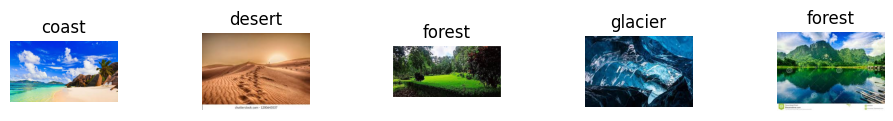

In [11]:
import matplotlib.pyplot as plt

# Create a figure with 16 subplots arranged in a 4x4 grid
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
fig.tight_layout(pad=3.0)  # Adds padding between plots

# Iterate over the grid and populate it with images and titles
for i, ax in enumerate(axes.flat):
    img = Image.open(img_paths[i])
    ax.imshow(img, cmap='gray')  # Assuming the images are in grayscale
    ax.set_title(labels[i])
    ax.axis('off')  # Turn off axis

# Display the figure
plt.show()